## Environment Set-up

First, we need to set up our environment by importing the **pandas**, **numpy**, and **matplotlib** libraries.

Then, we need to use pandas' **read_csv** function to read in our datasets.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# load in data 
movies = pd.read_csv('C:/ml-20m/movies.csv', sep = ',')
ratings = pd.read_csv('C:/ml-20m/ratings.csv', sep = ',', parse_dates = ['timestamp'])

inspect data

In [23]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
# get all animated movies
animated = movies[movies['genres'].str.contains('Animation')]
animated.shape

(1027, 3)

In [23]:
animated = pd.merge(animated, ratings, on = 'movieId', how = 'inner')
animated.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12,4.0,859063718
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,4.0,849082891
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1225311239
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0,990969772
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0,855176628


In [24]:
# get all animated CHILDREN's movies
animated_children = animated[animated['genres'].str.contains('Children')]
animated_children.shape

(922619, 6)

In [25]:
animated_children.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


In [26]:
# all animated NON-CHILDREN's movies
animated_adult = animated[~animated['genres'].str.contains('Children')]
animated_adult.shape

(217857, 6)

In [27]:
animated_adult.head()

,movieId,title,genres,userId,rating,timestamp
107829,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,298,1.0,992545537
107830,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,358,1.0,868840936
107831,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,609,4.0,1131798793
107832,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,1581,5.0,875922590
107833,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,1831,5.0,846421792


In [28]:
# count the # of movie ID's for each value of rating
# i.e. group the movie ID's by the rating value and then sum them up for each rating value
animated_adult[['movieId','rating']].groupby('movieId').count().head(5)

,rating
movieId,
392,275
610,7845
720,8171
741,7072
1151,368


In [29]:
animated_children['rating'].describe()

count    922619.000000
mean          3.604636
std           1.000843
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A1E9A58>]], dtype=object)

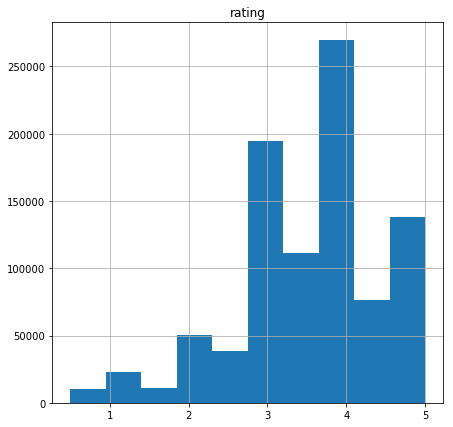

In [18]:
%matplotlib inline

# plot histogram of movie ratings in a 7x7 plot
animated_children.hist(column = 'rating', figsize = (7,7))

In [64]:
animated_children['rating_log'] = np.sqrt(animated_children['rating'])
animated_children.head(5)

,movieId,title,genres,userId,rating,timestamp,rating_log
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407,2.000000
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452,2.236068
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871,2.000000
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887,2.000000
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821,2.121320


In [69]:
animated_adult['rating'].describe()

count    217857.000000
mean          3.671945
std           1.029405
min           0.500000
25%           3.000000
50%           4.000000
75%           4.500000
max           5.000000
Name: rating, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000617BD518>]], dtype=object)

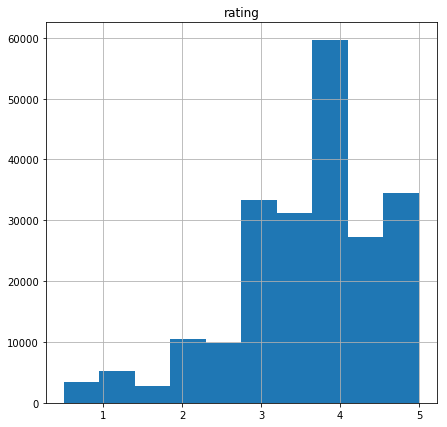

In [70]:
# plot histogram of movie ratings in a 7x7 plot

animated_adult.hist(column = 'rating', figsize = (7,7))

In [65]:
animated_adult['rating_log'] = np.sqrt(animated_adult['rating'])
animated_adult.head(5)

,movieId,title,genres,userId,rating,timestamp,rating_log
0,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,298,1.0,992545537,1.000000
1,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,358,1.0,868840936,1.000000
2,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,609,4.0,1131798793,2.000000
3,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,1581,5.0,875922590,2.236068
4,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,1831,5.0,846421792,2.236068


both left skewed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000005FE209B0>]], dtype=object)

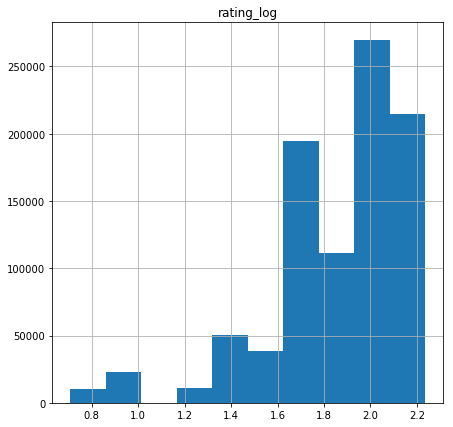

In [66]:
animated_children.hist(column = 'rating_log', figsize = (7,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000008BFBB048>]], dtype=object)

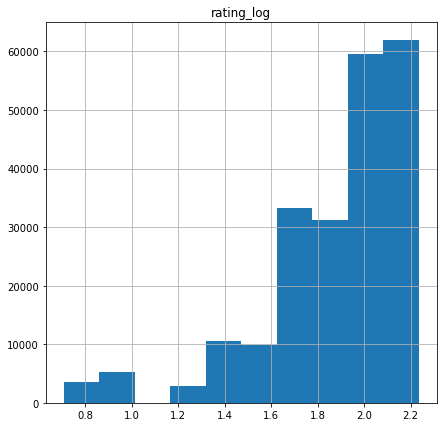

In [67]:
animated_adult.hist(column = 'rating_log', figsize = (7,7))

## Log didn't fix

However, it should be noted that in journals and other publications you will usually see the interquartile range reported as 45 to 71, rather than the calculated range.

In [36]:
def create_sampling_distribution(df,listArg):
    i = 0
    while (i < 200):
        x = np.array(df['rating'].sample(n=100)).mean()
        listArg.append(float(round(x,2)))
        i += 1
#children_means[:5]

In [37]:
children_means = []
adult_means = []

create_sampling_distribution(animated_children,children_means)
create_sampling_distribution(animated_adult,adult_means)

In [38]:
children_means[:5]

[3.51, 3.6, 3.57, 3.7, 3.7]

In [39]:
adult_means[:5]

[3.55, 3.78, 3.8, 3.62, 3.74]

(array([  5.,   4.,  20.,  19.,  32.,  40.,  47.,  20.,   8.,   5.]),
 array([ 3.38 ,  3.435,  3.49 ,  3.545,  3.6  ,  3.655,  3.71 ,  3.765,
         3.82 ,  3.875,  3.93 ]),
 <a list of 10 Patch objects>)

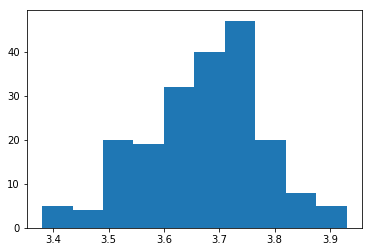

In [40]:
plt.hist(adult_means)

(array([  5.,  15.,  18.,  33.,  37.,  38.,  25.,  19.,   9.,   1.]),
 array([ 3.36 ,  3.411,  3.462,  3.513,  3.564,  3.615,  3.666,  3.717,
         3.768,  3.819,  3.87 ]),
 <a list of 10 Patch objects>)

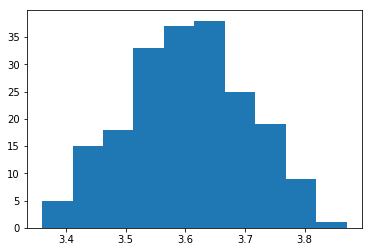

In [41]:
# plot histogram of movie ratings in a 7x7 plot
plt.hist(children_means)

Samples are now relatively normal

In [86]:
# mu is from population = all animated movies
x_children = round(float(np.float64(children_means).mean()),3)
x_adult = round(float(np.float64(adult_means).mean()),3)

degFreedom = (len(children_means) + len(children_means)) - 2

s_children = round(float(np.float64(children_means).std()),3)
s_adult = round(float(np.float64(adult_means).std()),3)

stdErr = round(math.sqrt(s_children**2/len(children_means)) + (s_adult**2/len(adult_means)),4)

t = (x_children - x_adult)/stdErr

In [87]:
t

-9.436619718309883